# posttest 6
# sulhairah(2009106026)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("New Life Expectancy Data.csv")

df.head(5)

,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,infantdeaths_encoder,0,1
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,62.0,0.0,1.0
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,64.0,0.0,1.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,66.0,0.0,1.0
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,69.0,0.0,1.0
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,71.0,0.0,1.0


# Alogaritam K-mean Clustering

In [3]:
model = KMeans(n_clusters=3)

In [4]:
points = df[['Adult Mortality', 'percentage expenditure']]

In [5]:
model.fit(points)

KMeans(n_clusters=3)

In [6]:
cluster_array = model.labels_

In [7]:
print(cluster_array)

[1 1 1 ... 1 1 1]


# Visualisasi

In [8]:
X = points['Adult Mortality']
Y = points['percentage expenditure']

In [9]:
centroid = model.cluster_centers_

In [10]:
centroid

array([[   65.63483146,  5210.77190656],
       [  172.93746066,   257.80982077],
       [   63.47727273, 12301.21439702]])

In [11]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [12]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,65.634831
1,172.937461
2,63.477273


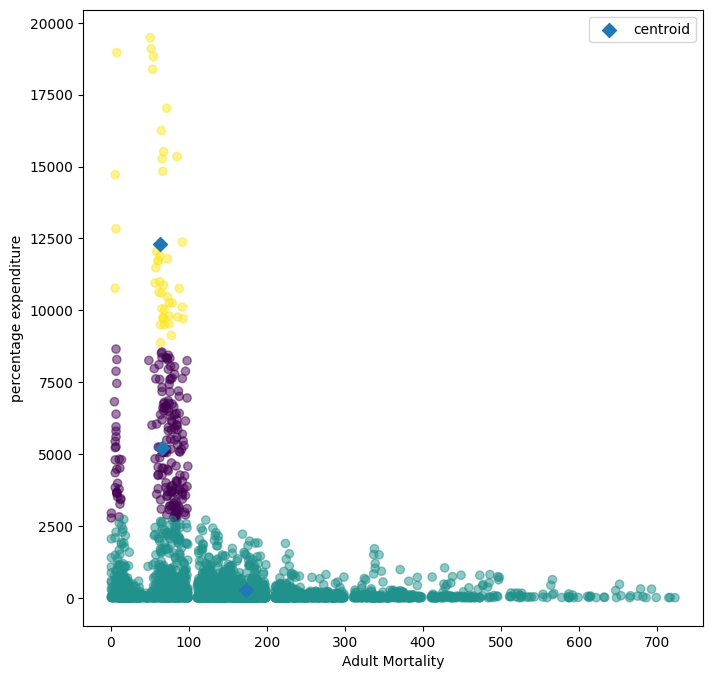

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, alpha=0.5, c=cluster_array)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel("Adult Mortality")
plt.ylabel('percentage expenditure')
plt.legend()
plt.show()

# Metode Elbow

In [14]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

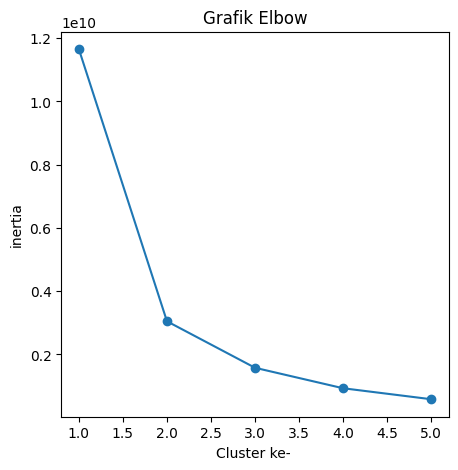

In [15]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster ke- ")
plt.ylabel('inertia')
plt.show()